In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("darkgrid")
sns.set(rc={'figure.figsize':(8,6)}) # adjust figure size\

import re

from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

from datetime import datetime
import matplotlib.pyplot as plt

# Enrollment -- Successful V.S. Unsuccessful Student

In [2]:
#read the csv document
enrollment = pd.read_csv('df_Enrollment.csv')

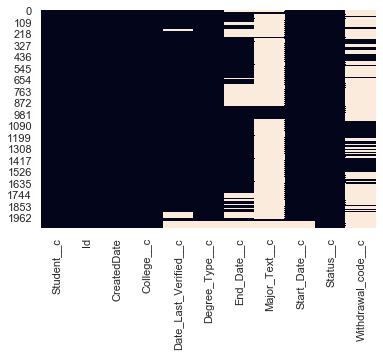

In [3]:
sns.heatmap(enrollment.isnull(), cbar=False)

In [4]:
total = enrollment.isnull().sum().sort_values(ascending=False)
percent = (enrollment.isnull().sum()/enrollment.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total Missing', 'Percent'])
missing_data

,Total Missing,Percent
Major_Text__c,1899,0.921397
Withdrawal_code__c,1427,0.692382
End_Date__c,541,0.262494
Date_Last_Verified__c,136,0.065987
Degree_Type__c,63,0.030568
Start_Date__c,59,0.028627
Status__c,0,0.000000
College__c,0,0.000000
CreatedDate,0,0.000000
Id,0,0.000000


In [5]:
# remove rows where Start_Date__c is NULL
df = enrollment[['Student__c', 'Status__c','Start_Date__c']].dropna()

In [6]:
df.head()

,Student__c,Status__c,Start_Date__c
0,00346000002iXakAAE,Attending,8/21/17 0:00
1,0034600000iXknRAAS,Withdrew,6/3/19 0:00
2,0034600000iXknDAAS,Attending,8/28/17 0:00
3,0034600000iXknZAAS,Attending,8/21/17 0:00
4,0034600000iXkmXAAS,Attending,8/15/17 0:00


In [7]:
df.shape

(2002, 3)

In [8]:
df['Student__c'].nunique()

1087

In [9]:
# change to datetime format for further ranking
df['Start_Date__c'] =  pd.to_datetime(df['Start_Date__c'], format="%m/%d/%y %H:%M")

Text(0.5, 1.0, 'Count of status')

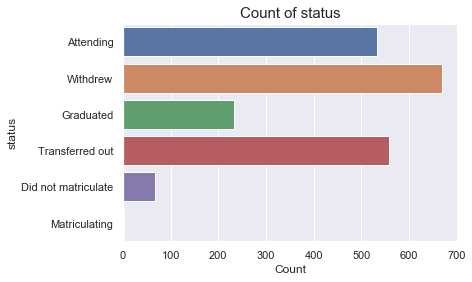

In [10]:
# different status
ax = sns.countplot(y="Status__c", data=enrollment)

plt.xlabel("Count", fontsize= 12)
plt.ylabel("status", fontsize= 12)
plt.title("Count of status", fontsize= 15)

In [11]:
# unsuccessful student
enrollment[enrollment['Student__c'] == '00346000002iXekAAE'].loc[:, ~enrollment.columns.isin(['Major_Text__c', 'College__c'])]

,Student__c,Id,CreatedDate,Date_Last_Verified__c,Degree_Type__c,End_Date__c,Start_Date__c,Status__c,Withdrawal_code__c
330,00346000002iXekAAE,a0046000001UcJdAAK,3/15/17 15:46,11/18/19 0:00,Associate's or Certificate (TBD),5/10/15 0:00,1/12/15 0:00,Transferred out,NaN
553,00346000002iXekAAE,a0046000004Ipk5AAC,12/20/17 23:53,11/18/19 0:00,Associate's or Certificate (TBD),12/16/17 0:00,1/17/17 0:00,Withdrew,NaN
1201,00346000002iXekAAE,a0046000001Uep8AAC,3/15/17 15:48,11/18/19 0:00,Bachelor's,12/19/14 0:00,9/2/14 0:00,Transferred out,Academic
1266,00346000002iXekAAE,a0046000001UemeAAC,3/15/17 15:48,11/18/19 0:00,Bachelor's,12/22/16 0:00,9/8/15 0:00,Transferred out,NaN


In [12]:
# attending student (do not consider)
enrollment[enrollment['Student__c'] == '0034600000iXknRAAS'].loc[:, ~enrollment.columns.isin(['Major_Text__c', 'College__c'])]

,Student__c,Id,CreatedDate,Date_Last_Verified__c,Degree_Type__c,End_Date__c,Start_Date__c,Status__c,Withdrawal_code__c
1,0034600000iXknRAAS,a004p000007OakbAAC,11/21/19 20:29,11/21/19 0:00,Associate's,8/6/19 0:00,6/3/19 0:00,Withdrew,Summer Academics
241,0034600000iXknRAAS,a004p000007OdGUAA0,12/5/19 23:05,11/18/19 0:00,Associate's or Certificate (TBD),NaN,8/26/19 0:00,Attending,NaN
1640,0034600000iXknRAAS,a0046000002cWQPAA2,6/26/17 14:21,11/18/19 0:00,Bachelor's,12/15/18 0:00,8/23/17 0:00,Withdrew,Academic


In [13]:
# successful student
enrollment[enrollment['Student__c'] == '00346000002iXaWAAU'].loc[:, ~enrollment.columns.isin(['Major_Text__c', 'College__c'])]

,Student__c,Id,CreatedDate,Date_Last_Verified__c,Degree_Type__c,End_Date__c,Start_Date__c,Status__c,Withdrawal_code__c
316,00346000002iXaWAAU,a0046000001UcHYAA0,3/15/17 15:46,11/18/19 0:00,Associate's or Certificate (TBD),7/26/15 0:00,6/3/15 0:00,Transferred out,Summer Academics
925,00346000002iXaWAAU,a0046000001Uf27AAC,3/15/17 15:48,11/18/19 0:00,Bachelor's,5/11/19 0:00,8/25/14 0:00,Graduated,NaN


In [14]:
# some exploration about students whose status is "Did not matriculate"
temp = enrollment[enrollment['Status__c'] == 'Did not matriculate']
temp.shape

(67, 11)

In [15]:
temp1 = temp.groupby('Student__c').agg(['nunique'])
temp1.shape

(64, 10)

In [16]:
temp1[temp1[('Id', 'nunique')] > 1]

,Id,CreatedDate,College__c,Date_Last_Verified__c,Degree_Type__c,End_Date__c,Major_Text__c,Start_Date__c,Status__c,Withdrawal_code__c
,nunique,nunique,nunique,nunique,nunique,nunique,nunique,nunique,nunique,nunique
Student__c,,,,,,,,,,
00346000002iXeJAAU,2,2,2,2,2,2,0,2,1,0
00346000002iXeVAAU,2,2,2,2,2,2,0,2,1,0
0034600000iXkmKAAS,2,2,2,1,2,1,0,1,1,0


In [17]:
# conclusion:
# 67 entries whose status is "Did not matriculate", 64 unique entries
# 3 students have more than one entries
# does not affect the result, remove all

In [18]:
# drop rows where "status" is either "Did not matriculate" or "matriculating"
df.drop(df[(df['Status__c'] == 'Matriculating') | (df['Status__c'] == 'Did not matriculate')].index, inplace = True)

In [19]:
df.shape

(1933, 3)

In [20]:
df.head()

,Student__c,Status__c,Start_Date__c
0,00346000002iXakAAE,Attending,2017-08-21
1,0034600000iXknRAAS,Withdrew,2019-06-03
2,0034600000iXknDAAS,Attending,2017-08-28
3,0034600000iXknZAAS,Attending,2017-08-21
4,0034600000iXkmXAAS,Attending,2017-08-15


## students who are successful
**How to define "successful" student? At least one "Graduated" status**

In [21]:
graduated = df[df['Status__c'] == 'Graduated']
graduated.shape

(233, 3)

In [22]:
graduated_student_id = graduated['Student__c'].drop_duplicates().to_frame().reset_index()
del graduated_student_id['index']

In [23]:
# this is a list of students(unique ID) who are "successful"
graduated_student_id

,Student__c
0,00346000002iWAkAAM
1,0034600000iXknHAAS
2,00346000002iXcPAAU
3,00346000002iXZtAAM
4,00346000002iXbCAAU
...,...
204,00346000002iWOEAA2
205,0034600001EXcUBAA1
206,00346000002iXY6AAM
207,00346000002iXXNAA2


In [24]:
# export csv file
graduated_student_id.to_csv('successful_students.csv')

## students who should not be considered
**How to define "not_considered" student? The latest status is "attending" and never "graduated" before**

In [25]:
# eliminate successful students
rest_stduents = df[~df['Student__c'].isin(graduated_student_id['Student__c'])]

In [26]:
# rest of students (duplicates included)
rest_stduents.shape

(1443, 3)

In [27]:
# export table, use SQL to rank
rest_stduents.to_csv('rest_students.csv')

In [28]:
# This is SQL code
'''SELECT *, RANK () OVER (PARTITION BY Student__c ORDER BY Start_Date__c DESC) AS rk
FROM rest_students
'''

'SELECT *, RANK () OVER (PARTITION BY Student__c ORDER BY Start_Date__c DESC) AS rk\nFROM rest_students\n'

In [29]:
# read the ranked table
rest_stduents_with_rank = pd.read_csv('rest_students_with_rank.csv')

In [30]:
rest_stduents_with_rank.head()

,Student__c,Status__c,Start_Date__c,rk
0,00346000002iW9lAAE,Withdrew,8/21/17,1
1,00346000002iW9lAAE,Attending,8/19/19,2
2,00346000002iW9lAAE,Withdrew,8/14/13,3
3,00346000002iW9mAAE,Transferred out,8/21/13,1
4,00346000002iW9mAAE,Transferred out,6/8/16,2


In [31]:
# select students whose latest status is attending
attending = rest_stduents_with_rank[(rest_stduents_with_rank['Status__c'] == 'Attending') & rest_stduents_with_rank['rk'] == 1]

In [32]:
attending_student_id = attending['Student__c'].drop_duplicates().to_frame().reset_index()
del attending_student_id['index']

In [33]:
attending_student_id

,Student__c
0,00346000002iW9zAAE
1,00346000002iWA1AAM
2,00346000002iWA7AAM
3,00346000002iWAeAAM
4,00346000002iWApAAM
...,...
383,0034p00001f3vflAAA
384,0034p00001f3vfQAAQ
385,0034p00001f3vfVAAQ
386,0034p00001f3vfzAAA


## students who are unsuccessful
**How to define "unsuccessful" student? The lastest status is not 'attending' and never "graduated" before**

In [34]:
# the rest of the rest of students
other_stduent = rest_stduents[~rest_stduents['Student__c'].isin(attending_student_id['Student__c'])]

In [35]:
other_student_id = other_stduent['Student__c'].drop_duplicates().to_frame().reset_index()
del other_student_id['index']

In [36]:
# this is a list of students(unique ID) who are unsuccessful
other_student_id

,Student__c
0,0034600000iXkn6AAC
1,0034600000iXkm9AAC
2,00346000002iXYFAA2
3,0034600001EXcTfAAL
4,0034600001EXcTHAA1
...,...
465,00346000002iXc4AAE
466,00346000002iXdJAAU
467,00346000002iXYzAAM
468,00346000002iWO8AAM


In [37]:
# check: match!!!
df['Student__c'].nunique() # 209 + 388 + 470 = 1067

1067

## Conclusions and export files

In [38]:
# conclusion:
# Based on status, we labeled 679 students with either 'successful' or 'unsuccessful'
# 209 successful studeht (who graduated successfully)
# 470 unsuccessful students whose status is not currently attending, and never graduated in the past

In [41]:
# export csv files
# graduated_student_id.to_csv('successful_students.csv', index = False)

In [40]:
# other_student_id.to_csv('unsuccessful_students.csv', index = False)